In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

In [4]:
train=pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

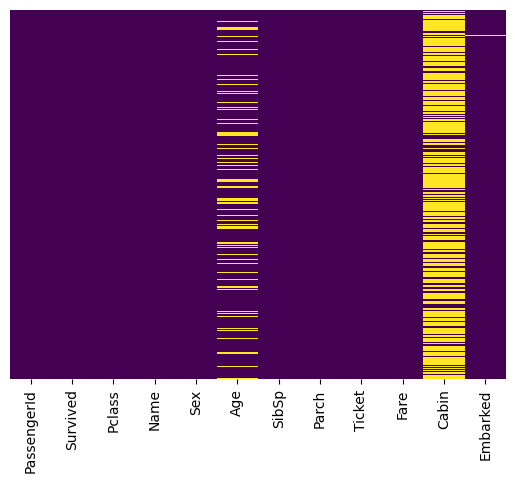

In [11]:
# Create a heatmap to see the missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

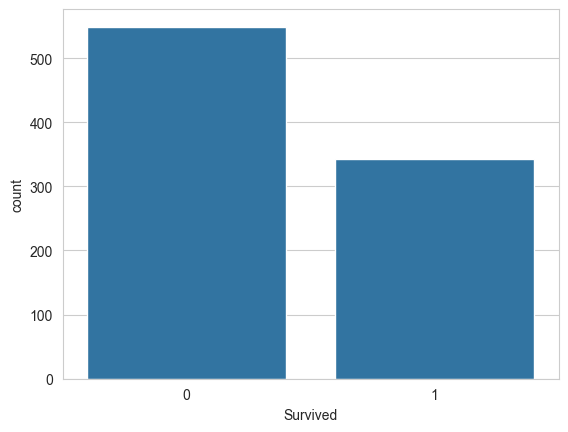

In [13]:
# count of who survied who is not
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

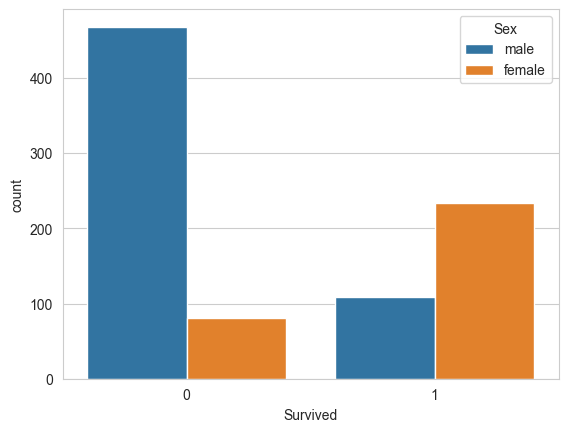

In [14]:
# count of who survied who is not wrt sex
sns.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

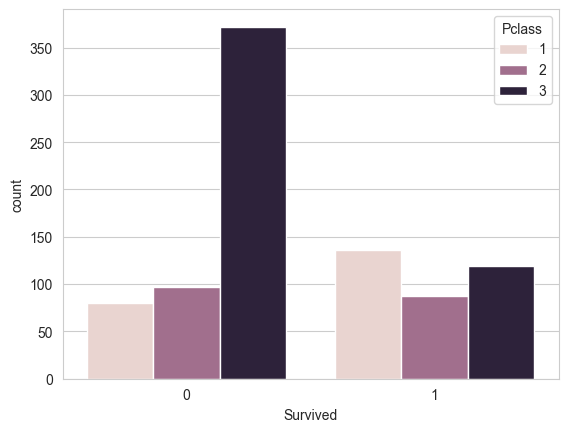

In [15]:
# Check which class passengers died more
sns.countplot(x='Survived',hue='Pclass',data=train)

<Axes: xlabel='Age', ylabel='Count'>

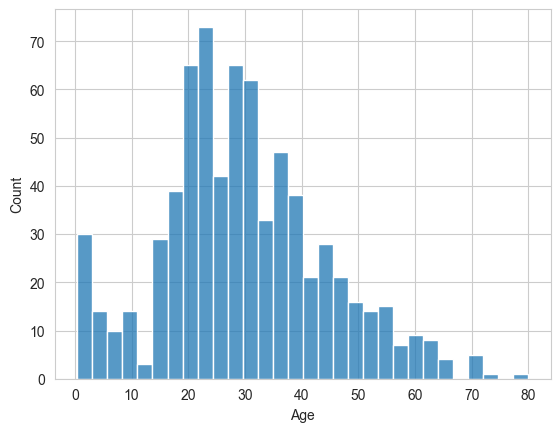

In [17]:
# Age of the people in the titanic
sns.histplot(train['Age'].dropna(),kde=False,bins=30)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

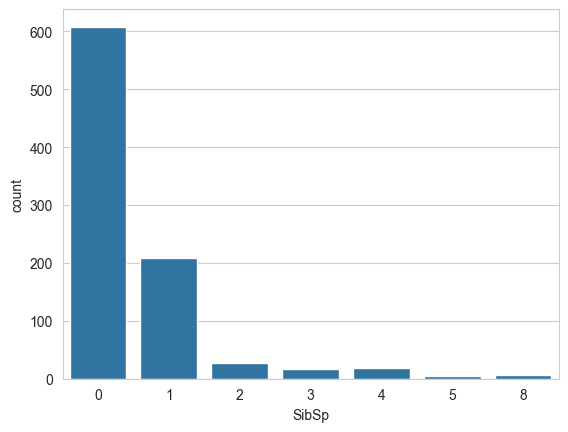

In [21]:
# Explore sibsp
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Fare', ylabel='Count'>

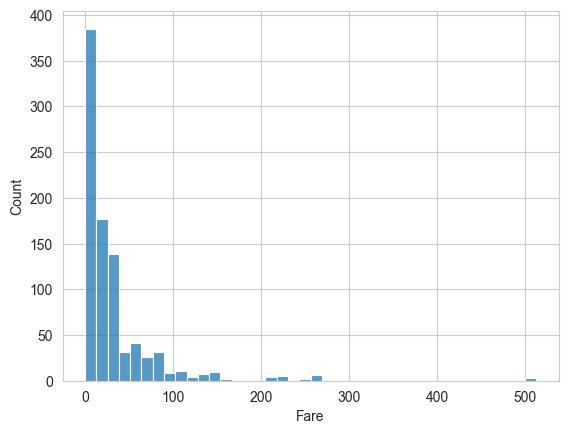

In [25]:
sns.histplot(x='Fare',data=train, bins=40)

In [26]:
# To get the above plot much better way using cufflinks an interactive way
import cufflinks as cf

In [27]:
cf.go_offline()

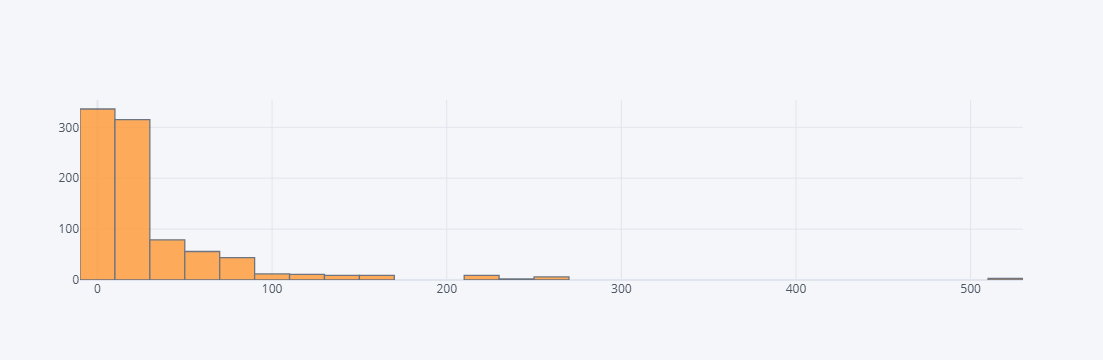

In [28]:
train['Fare'].iplot(kind='hist', bins=30)

In [ ]:
# fill in missing data for Age colums (Average age filling)
sns.boxplot(x='Pclass', y='Age',data=train)

def impute_age(cols):
    Age=cols['Age']
    Pclass=cols['Pclass']

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [33]:
# Applying the above function
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

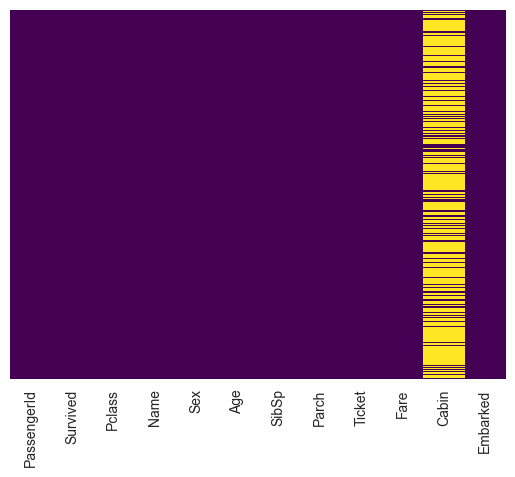

In [35]:
# Added the Null values of Age with Average values 
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
train.drop('Cabin',axis=1,inplace=True)

In [47]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


<Axes: >

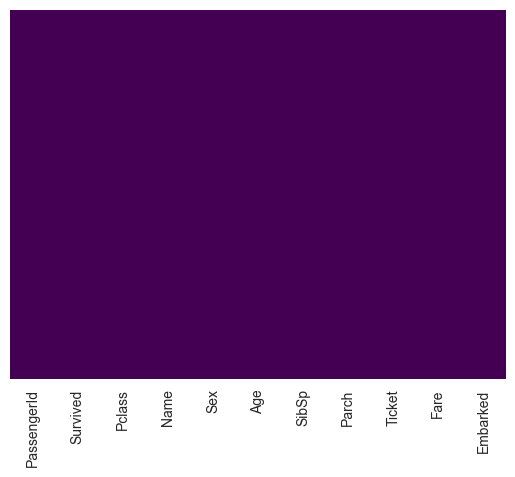

In [42]:
# Removed the Cabin values, so now there ar eno missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
train.dropna(inplace=True)

In [45]:
# convert into categorical features
sex=pd.get_dummies(train['Sex'], drop_first=True)

In [46]:
sex.head(10)

,male
0,True
1,False
2,False
3,False
4,True
5,True
6,True
7,True
8,False
9,False


In [48]:
embark=pd.get_dummies(train['Embarked'], drop_first=True)

In [52]:
train=pd.concat([train,sex,embark],axis=1)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [54]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [56]:
train.drop('PassengerId',axis=1,inplace=True)

In [58]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [59]:
X= train.drop('Survived',axis=1)
y= train['Survived']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [69]:
logmodel=LogisticRegression(max_iter=1000)

In [70]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [72]:
from sklearn.metrics import classification_report

In [71]:
prediction=logmodel.predict(X_test)

**Evaluation**

In [73]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y_test, prediction)

array([[150,  13],
       [ 32,  72]], dtype=int64)